In [1]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('zomato.csv')

In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.shape

(51717, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [6]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

# Data Cleaning
## 1. dropping unnecessary columns

We have 17 columns, but we will work on the most important ones so rest of the columns will be removed.

1. url
2. address
3. phone
4. dish_liked
5. reviews_list
6. menu_item

In [7]:
df.drop(['url','address','phone','dish_liked','reviews_list','menu_item'],axis=1,inplace=True)

In [8]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


## 2. rename the columns

here we will rename the column names for easier identification, this is optional step. 

In [9]:
df.rename(columns={'rate':'ratings','approx_cost(for two people)':'cost','listed_in(type)':'type','listed_in(city)':'city'},inplace=True)

In [10]:
df.head()

,name,online_order,book_table,ratings,votes,location,rest_type,cuisines,cost,type,city
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


here we can see that, we have 10 columns with the appropriate column names.

## 3. Drop duplicates

Now check for duplicate rows, sometimes our dataset has some duplicate rows, sometimes it can create variations in the results so we have to take care off them.

In [11]:
df.duplicated().sum()

108

here we have 124 duplicate rows in our dataset, so we can drop them.

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

after dropping the duplicate rows we have 51593 rows and 11 columns. 

## 4. Data individual rows

(1)	First, we will remove the redundant data from the name column. Here we remove the punctuation, special characters, numbers etc.

In [14]:
## cleaning 'name' column
def name(text):
    return re.sub(r"[^a-zA-Z0-9 ]", "", text)

df['name'] = df['name'].apply(lambda x: name(x))

In [15]:
df['name']

0                                                    Jalsa
1                                           Spice Elephant
2                                          San Churro Cafe
3                                    Addhuri Udupi Bhojana
4                                            Grand Village
                               ...                        
51712        Best Brews  Four Points by Sheraton Bengaluru
51713                             Vinod Bar And Restaurant
51714    Plunge  Sheraton Grand Bengaluru Whitefield Ho...
51715    Chime  Sheraton Grand Bengaluru Whitefield Hotel 
51716                          The Nest  The Den Bengaluru
Name: name, Length: 51609, dtype: object

(2)	Now we’ll work on rate column
We can see that ‘rate’ column has ‘nan’, ‘NEW’ and ‘-’ values, and all the numeric data is in the string format so we have to fix this, first we’ll remove the insignificant data and convert the data into numeric data


In [16]:
df['ratings'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [17]:
## Removing 'NEW', 'nan' and '-'
df['ratings'] = df['ratings'].replace("NEW", np.nan)
df['ratings'] = df['ratings'].replace("nan", np.nan)
df['ratings'] = df['ratings'].replace("NaN", np.nan)
df['ratings'] = df['ratings'].replace("-", np.nan)

In [18]:
df['ratings'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [19]:
df['ratings'].isnull().sum()

10019

In [20]:
## function to remove '/5'
def remove_5(value):
    if type(value)==str:
        new_value = value.split('/')[0]
        return new_value

df['ratings'] = df['ratings'].apply(remove_5)

## convert string datatype to float datatype
df['ratings'] = df['ratings'].astype(float)

In [21]:
df['ratings']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: ratings, Length: 51609, dtype: float64

In this 'cost' column the string values containing commas, so we have to fix this, and convert it to float or intiger values.

In [22]:
df['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [23]:
## function to remove commas and convert the datatype from string to float type
def convert_cost(value):
    value = str(value)
    if "," in value:
        value = float(value.replace(",",""))
        return value
    else:
        return float(value)

df['cost'] = df['cost'].apply(convert_cost)

In [24]:
df['cost']

0         800.0
1         800.0
2         800.0
3         300.0
4         600.0
          ...  
51712    1500.0
51713     600.0
51714    2000.0
51715    2500.0
51716    1500.0
Name: cost, Length: 51609, dtype: float64

## 5. Handling missing data

here we simply check for missing data. if we get missing data then we will drop all the missing rows.

In [25]:
df.isnull().sum()

name                0
online_order        0
book_table          0
ratings         10019
votes               0
location           21
rest_type         227
cuisines           45
cost              344
type                0
city                0
dtype: int64

In [26]:
df.dropna(inplace=True)

In [27]:
df.isnull().sum()

name            0
online_order    0
book_table      0
ratings         0
votes           0
location        0
rest_type       0
cuisines        0
cost            0
type            0
city            0
dtype: int64

In [28]:
df.shape

(41190, 11)

After doing all the cleaning steps, we get the cleaned data to start our analysis.

# Exploratory Data Analysis

Now we have cleaned the data and it is ready for the analysis, so let's begin...

1.	How many restaurants in Bangalore take online orders?

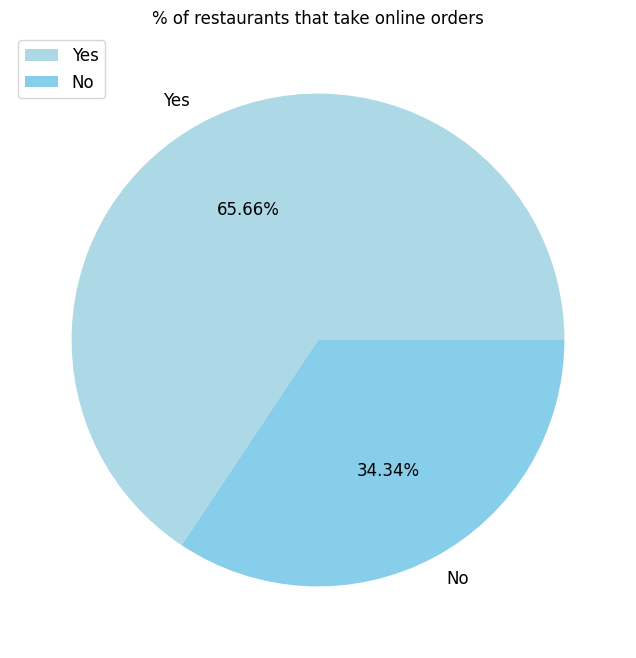

In [29]:
plt.figure(figsize=(20,8))
df['online_order'].value_counts().plot(kind='pie',colors=['lightblue','skyblue'],autopct='%1.2f%%', textprops={'fontsize': 12})
plt.title('% of restaurants that take online orders',size=12)
plt.xlabel('',size=12)
plt.ylabel('',size=12)
plt.legend(loc=2, prop={'size': 12})
plt.show()

As we all know that in the online era almost everything is online nowadays and we can clearly see in the above graph that almost 66% of the restaurants have the online ordering facility.

2.	What percentage of restaurants offer table booking facilities?

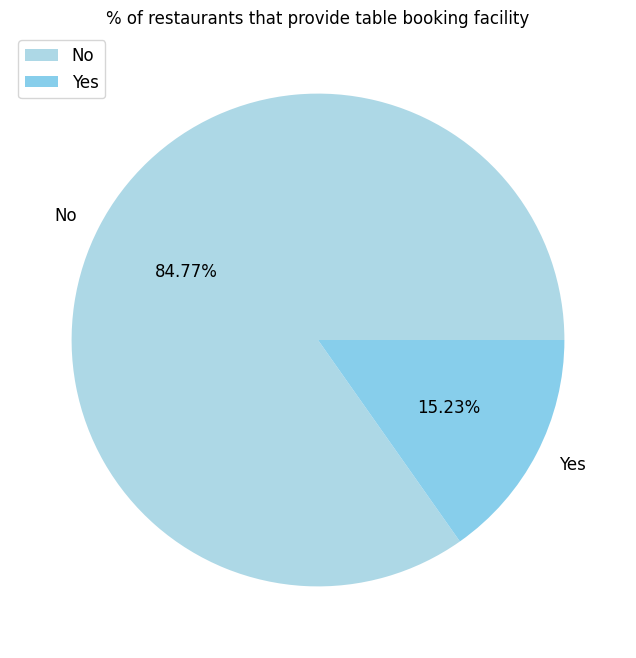

In [30]:
plt.figure(figsize=(20,8))
df['book_table'].value_counts().plot(kind='pie',colors=['lightblue','skyblue'],autopct='%1.2f%%', textprops={'fontsize': 12})
plt.title('% of restaurants that provide table booking facility',size=12)
plt.xlabel('',size=12)
plt.ylabel('',size=12)
plt.legend(loc=2, prop={'size': 12})
plt.show()

from the above pie chart we can see that alomst 85% the restaurants in Bangalore don't have table booking facility through Zomato.

3.	What was the most common rating received by restaurants?

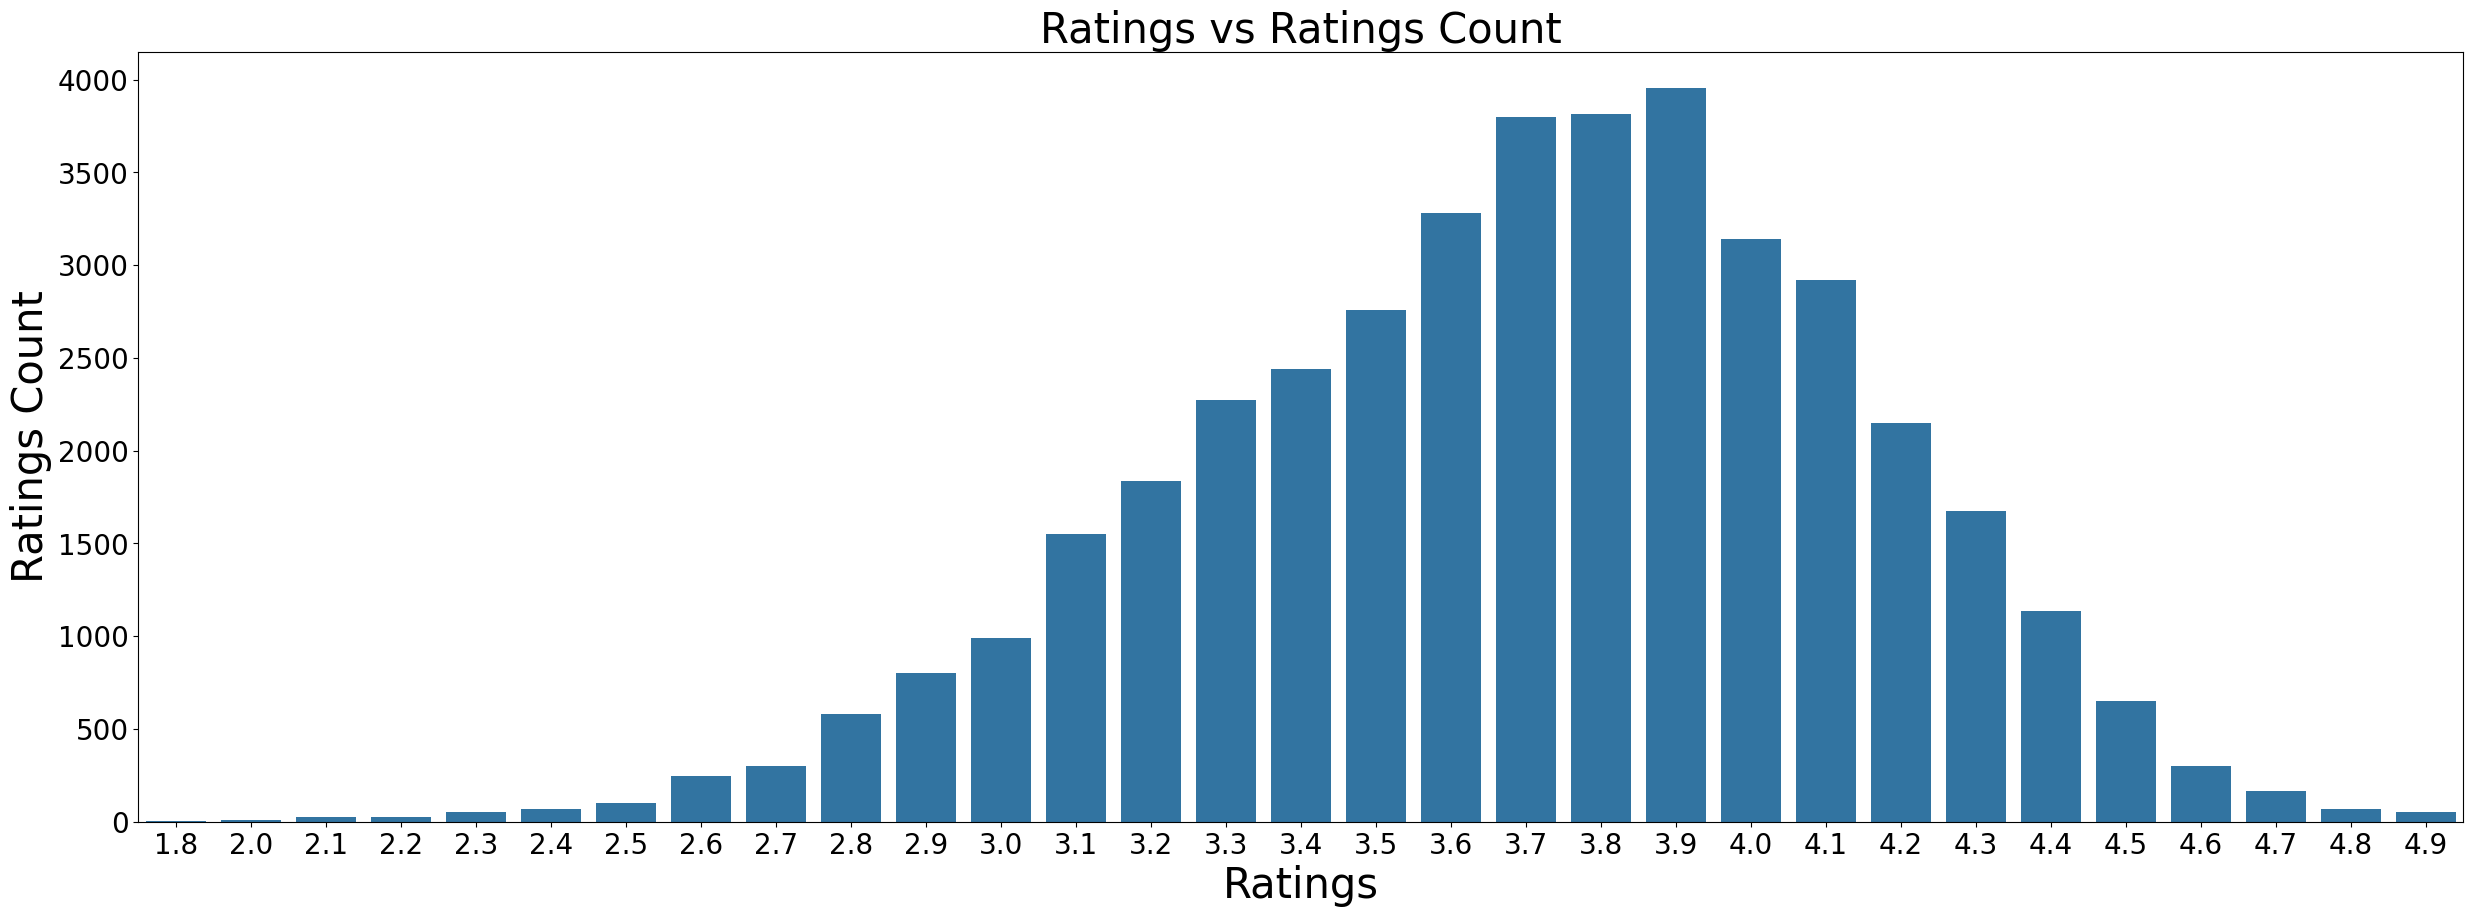

In [31]:
Rate=df.groupby(['ratings']).size().reset_index().rename(columns={0:'Rating_Count'})

plt.figure(figsize=(30,10))
sns.barplot(x='ratings', y='Rating_Count', data=Rate)
plt.title('Ratings vs Ratings Count', size=30)
plt.xlabel('Ratings', size=30)
plt.ylabel('Ratings Count', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

from the graph we can see that most of the retaurants in Bangalore received a rating of 3.6 to 4. very few restaurants have poor ratings and some restaurants has a very good ratings of 4.9 or 5.

4.	The top five cities in Bangalore with the highest and lowest-rated restaurants.

In [32]:
# cities with highest rated restaurants
df.groupby('city')['ratings'].mean().reset_index().sort_values(by='ratings', ascending=False)[0:5]

,city,ratings
7,Church Street,3.801338
5,Brigade Road,3.800742
21,MG Road,3.799536
27,Residency Road,3.778720
20,Lavelle Road,3.774948


In [33]:
# cities with lowest rated restaurants
df.groupby('city')['ratings'].mean().reset_index().sort_values(by='ratings')[0:5]

,city,ratings
8,Electronic City,3.495355
23,Marathahalli,3.556811
2,Bannerghatta Road,3.559486
6,Brookefield,3.567076
28,Sarjapur Road,3.599705


4.	The top five cities in Bangalore with the highest and lowest-rated restaurants.

when we talk about high-rated restaurants then most of them are found in Church Street, Brigade Road and MG Road, while Electronic City, Marathahalli, Bannerghatta has the low-rated restaurants.

5.	Which cuisine do customers like the most?

In [34]:
df.groupby('cuisines')['ratings'].mean().reset_index().sort_values(by='ratings',ascending=False)[0:5]

,cuisines,ratings
1001,"Continental, North Indian, Italian, South Indi...",4.9
1274,"Healthy Food, Salad, Mediterranean",4.9
172,"Asian, Chinese, Thai, Momos",4.9
989,"Continental, North Indian, Chinese, European, ...",4.8
192,"Asian, Mediterranean, North Indian, BBQ",4.8


On the basis of ratings, we can see that people like Continental, North Indian & Italian cuisines are popular among the restaurant customers in Bangalore.

6.	What is the average price for two people, based on the type of service?

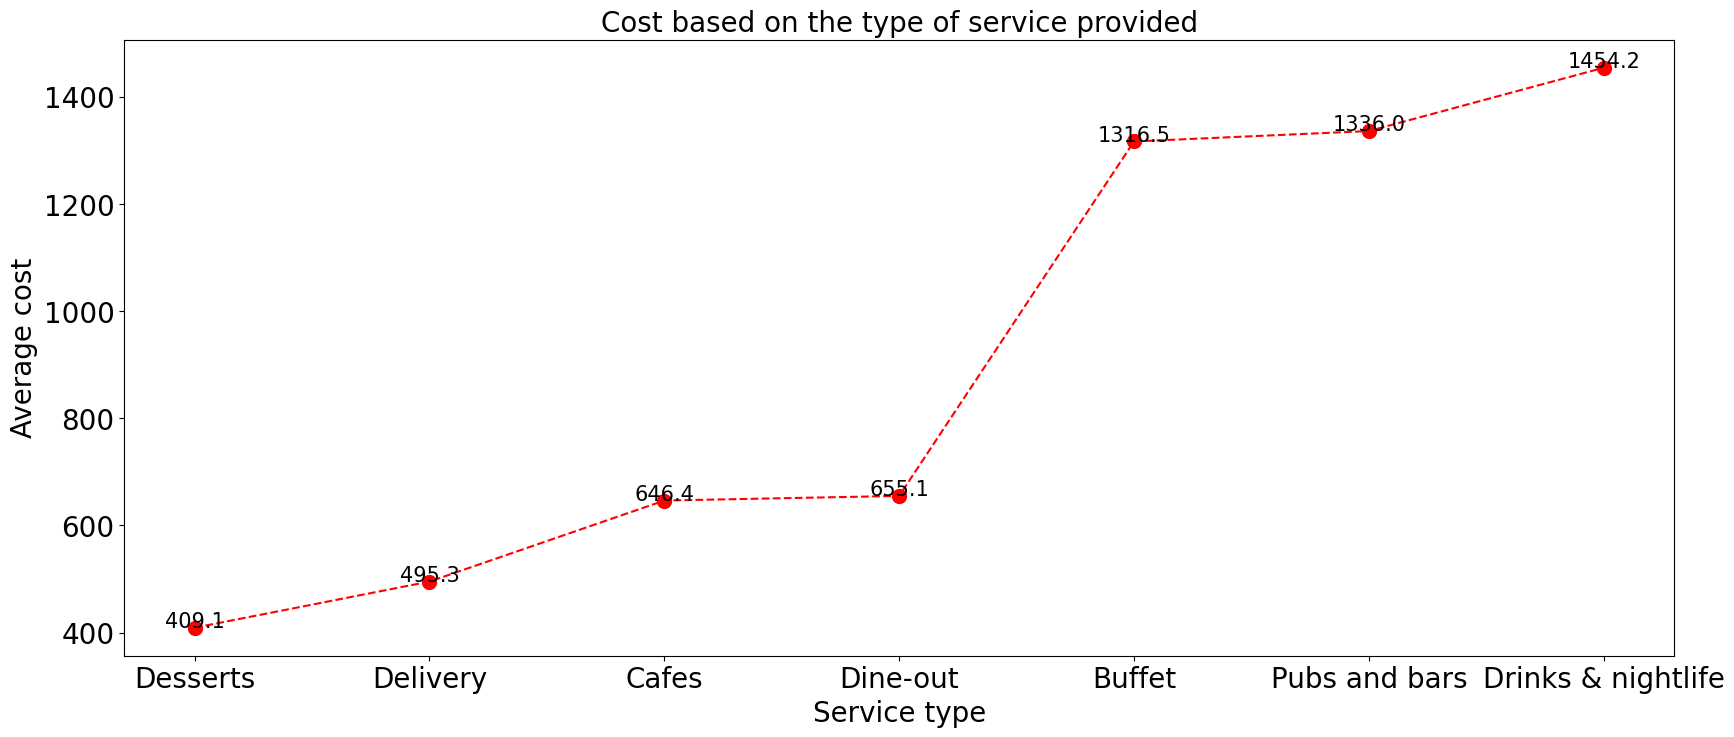

In [35]:
d=df.groupby('type')['cost'].mean().reset_index().sort_values(by='cost')
plt.figure(figsize=(20,8))
plt.plot(d['type'],d['cost'],'o--r',ms=10)
plt.xlabel('Service type',size=20)
plt.ylabel('Average cost',size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Cost based on the type of service provided',size=20)
for i,e in enumerate(d.cost):
    plt.text(i,e+1,round(e,1),fontsize=15,horizontalalignment='center')
plt.show()

Above line graph tells us that Desserts were the least expensive type of food, while Buffets and Drinks cost more than Rs.1300 for two people.

7.	Does the restaurant’s rating depend on whether it accepts online orders?

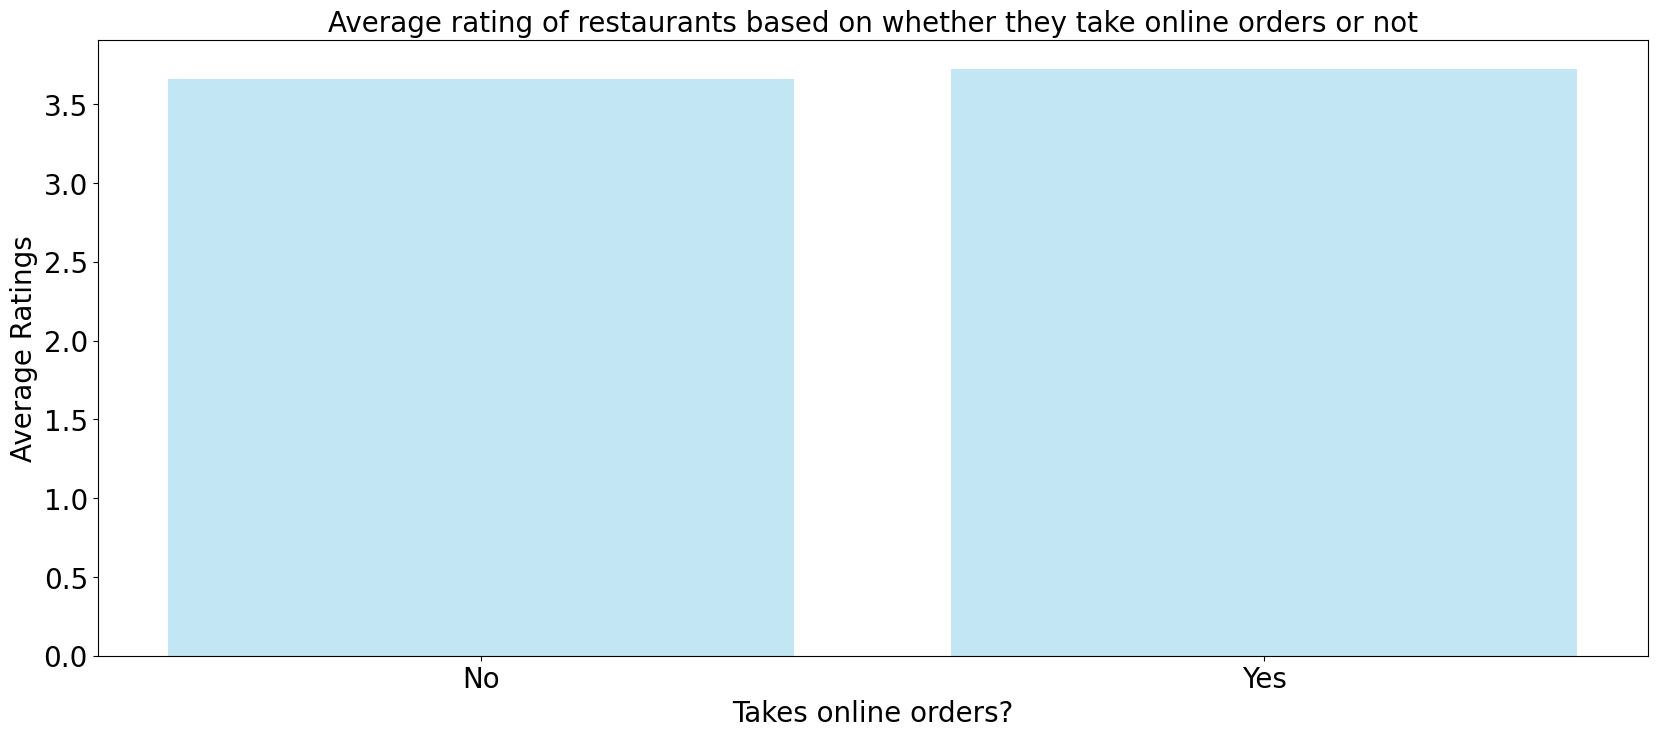

In [36]:
grp1=df.groupby('online_order')['ratings'].mean().reset_index()
plt.figure(figsize=(20,8))
plt.bar(grp1['online_order'],grp1['ratings'],alpha=0.5,color='skyblue')
plt.xlabel('Takes online orders?',size=20)
plt.ylabel('Average Ratings',size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Average rating of restaurants based on whether they take online orders or not',size=20)
plt.show()

Above graph shows that the restaurants receive almost same average ratings from the customers whether they take online or offline orders.

8.	What are the top 10 highest-rated restaurants?

In [37]:
df.groupby('name')['ratings'].mean().reset_index().sort_values(by='ratings', ascending=False)[0:10]

,name,ratings
943,Byg Brewski Brewing Company,4.900000
420,Asia Kitchen By Mainland China,4.900000
4886,Sant Spa Cuisine,4.900000
4445,Punjab Grill,4.871429
624,Belgian Waffle Factory,4.844828
5979,The Pizza Bakery,4.800000
1977,Flechazo,4.800000
4102,OG Variar Sons,4.800000
88,ABs Absolute Barbecues,4.789474
703,Biergarten,4.766667


here we have the list of top 10 highest-rated restaurants.

New questions from medium

1. In Bangalore city,in which area has maximum number of restaurants

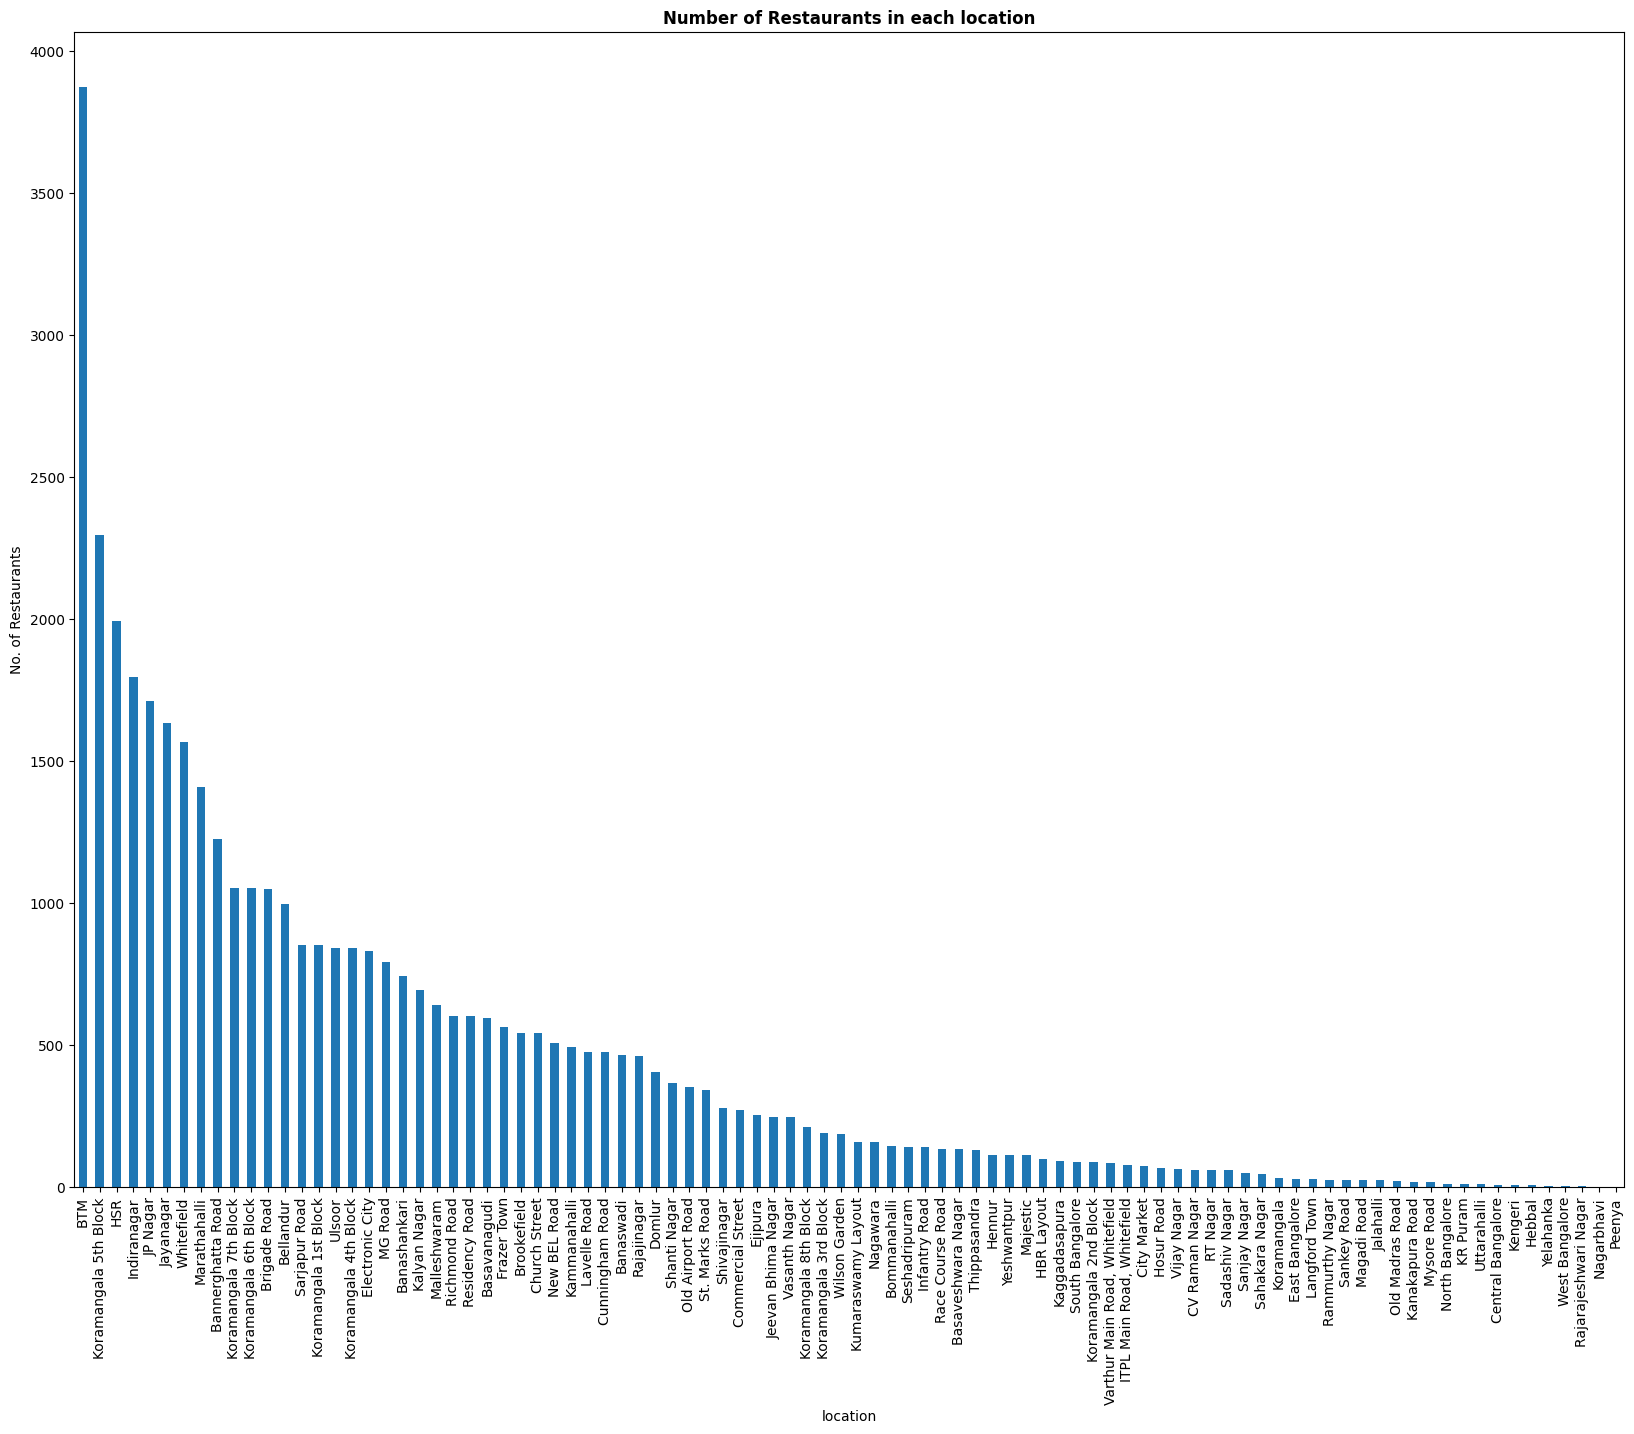

In [39]:
plt.figure(figsize=(20,15))
ax = df.location.value_counts().plot(kind='bar')
plt.title('Number of Restaurants in each location', weight='bold')
plt.xlabel('location')
plt.ylabel('No. of Restaurants')
plt.show()

we have total 92 different locations and from the above graph we can see that maximum restaurants are at BTM followed by Koramangla, HSR, Indiranagar, JP Nagar, and so on.

2. What type of restaurants are there in Bangalore?

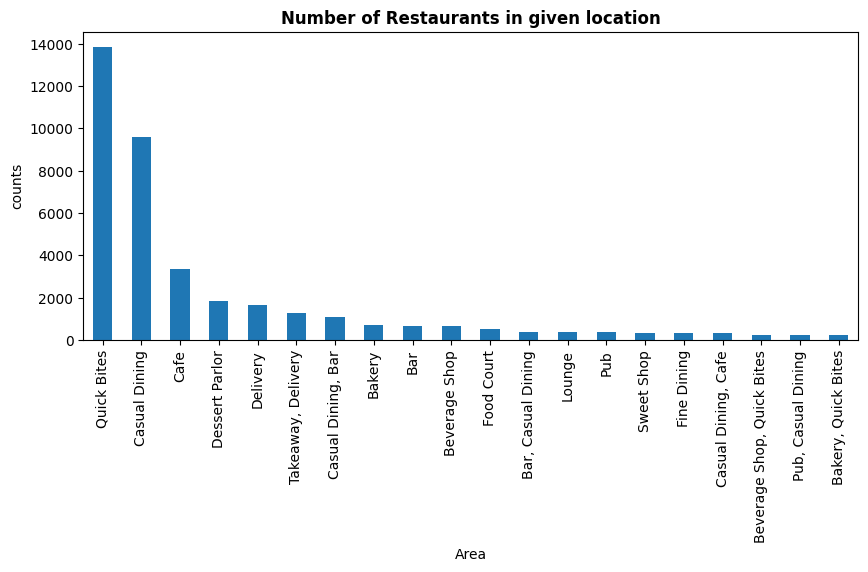

In [40]:
plt.figure(figsize=(10,4))
ax =df.rest_type.value_counts()[:20].plot(kind='bar')
plt.title('Number of Restaurants in given location', weight='bold')
plt.xlabel('Area')
plt.ylabel('counts')
plt.show()

We have several Restaurant types such as Quick bytes, Casual Dining, Cafe, Delivery, Dessert Parlors, Bar and so on.